<p style="text-align:center; font-size:300%; line-height:300%; font-weight:bold; background-color:#2F52A3; color:white">Résolutions</p>

**Recommandations :**

+ Préférez les notebooks à la version pdf
+ Pas d'installation en TP
+ Vous pouvez utiliser les VM LINUX


**Objectifs :**

+ Résoudre une équation du second degré, à l'aide d'une formule exacte.
+ Résoudre numériquement une équation de la forme $f(x) = 0$ avec une méthode "sur l'étagère"
+ Résoudre numériquement une équation de la forme $f(x) = 0$ avec une méthode "codée à la main" : dichotomie, Newton, point fixe.
+ Représentez graphiquement l'évolution d'une suite d'approximations
+ Utilisez différentes conditions d'arrêt dans un algorithme itératif

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import math
import numpy as np

from scipy.optimize import fsolve

<p style="font-size:150%; line-height:150%; font-weight:bold; color:#D67D3A">Attention : </p>

+ Respectez rigoureusement l'interface des fonctions, et les consignes.

+ Copiez-collez le code de votre fonction (ne contenant aucun print, ni effet de bord)

+ Utilisez les alias définis ci-dessus.

+ Même si vous travaillez à plusieurs, faites un dépôt par personne.

<p style="font-size:150%; line-height:150%; font-weight:bold; color:#AD84AD">Pour aller plus loin :</p>

Les paragraphes "Pour aller plus loin" sont à traiter en seconde lecture, après avoir fini tous les autres points.

<p style="font-size:200%; line-height:200%; font-weight:bold; background-color:#2F52A3; color:white">Résolutions exactes</p>

En dehors de quelques cas particuliers très simples, on ne sait pas résoudre de manière exacte une équation et même il est prouvé que ce n'est pas possible.

**Question "philosophique" :** Qu'est ce que résoudre une équation de manière exacte ?

<p style="font-size:150%; line-height:150%; font-weight:bold; color:#2F52A3">Equation du second degré</p>

On considère l'équation du second degré :
$$ax^2 + bx + c = 0$$
Pour résoudre cette équation :
+ On calcule le discriminant $\Delta$
$$\Delta = b^2 - 4ac$$
+ Si $\Delta > 0$, l'équation a deux solutions réelles :
$$x = \frac{-b \pm \sqrt{\Delta}}{2a}$$
+ Si $\Delta = 0$, l'équation possède une unique solution :
$$x = \frac{-b}{2a}$$
+ Si $\Delta < 0$, l'équation ne possède pas de solution réelle.

<p style="font-size:150%; line-height:150%; font-weight:bold; background-color:#FFDD00">Exercice de CM :</p>

Résoudre l'équation $x^2 - 4x + 3 = 0$

<p style="font-size:150%; line-height:150%; font-weight:bold; background-color:#FFDD00">Exercice de TP :</p>

Implémentez une fonction `solve2(C)` qui prend en paramètre $C$ un `numpy.array` contenant les coefficients :
$$C = \lbrack a,b,c \rbrack$$
et qui retourne un `numpy.array` contenant les éventuelles solutions (lorsqu'il y a $2$ solutions, ordonnez-les).

Testez votre fonction sur l'exemple précédent, ainsi que sur les deux équations suivantes :
$$x^2 + x + 1 = 0$$
$$x^2 + 2x + 1 = 0$$

**Déposez votre fonction `solve2(C)` sur Moodle avant la fin de la semaine**

In [2]:
# Fonction solve2
def solve2(C):
    a,b,c = C[0],C[1],C[2]
    delta = b**2 - 4*a*c
    if delta<0 :
        return []
    elif delta == 0:
        return [-b/(2*a)]
    else :
        return [(-b-np.sqrt(delta))/(2*a),(-b+np.sqrt(delta))/(2*a)]

In [3]:
# Tests de la fonction solve2
print(solve2([1,2,1]))
print(solve2([1,0,1]))
print(solve2([3,2,-1]))

[-1.0]
[]
[-1.0, 0.3333333333333333]


<p style="font-size:150%; line-height:150%; font-weight:bold; color:#AD84AD">Pour aller plus loin :</p>

+ Recherchez la méthode de résolution des équations de degré $3$, utilisant les formules de Cardan
+ Implémentez une fonction `solve3` similaire à l'exercice précédent, pour les équations de degré $3$
+ Faites un résumé de **trois lignes maximum** que **vous comprenez** sur **la théorie de Galois des équations algébriques**

Résolution d'équation de degré $3$ avec les formules de Cardan :

<p style="font-size:150%; line-height:150%; font-weight:bold; color:#D67D3A">A compléter ...</p>

In [4]:

def solve3(C):
    #equation of form ax**3 + bx**2 + cx + d = 0
    a,b,c,d = C[0],C[1],C[2],C[3]
    
    deviation = -b/(3*a) #x coordinate of the inflexion point
    #we deviate the equation to put the inflexion point on the y axis so that we cat get rid of the x**2 term
    
    #parameters of the reduced equation x**3 + px + q = 0
    p = (c/a)-(b**2/(3*(a**2)))
    q = ((2*b**2)/(27*a**3))-((b*c)/3*a**2)+(d/a)
    
    delta = (q/2)**2+(p/3)**3 #3rd degree equation discriminant
    
    if p==0 and q==0 : #exeption when p and q are null
        return [0]
    
    if delta > 0 : #positive discriminant, one real solution
        u = ((-q/2)-delta**0.5)**(1/3)
        v = ((-q/2)+delta**0.5)**(1/3)
        r = u+v+deviation
        return [r]
    
    elif delta == 0 : #null discriminant, two real solutions
        r0 = (3*q)/p
        r1 = -(3*q)/(2*p)
        
        return [r0+deviation,r1+deviation]
    
    else : #negative discriminant, three real solutions
        R = []
        for i in range(3): #computation of the three real solutions obtained from the three conjugate cube roots of the discriminant
            
            #angle of the solution
            angle = (3*q)/(2*p) 
            angle *= (3/-p)**(1/3)
            angle *= 1/3
            angle += 2*i*np.pi/3
            print(angle)
            
            R.append(2*(-p/3)**(1/3)*np.cos(angle) + deviation)
        
        return R
    

0.26456684199469993
2.3589619443878953
4.453357046781091
[2.432166357050209, -1.786721649563848, -0.6454447074863615]


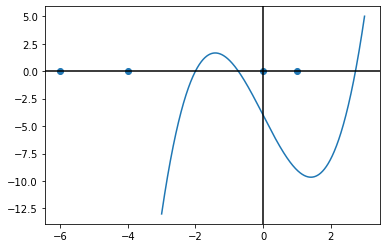

In [5]:
# Tests de la fonction solve3
fig,ax = plt.subplots(1,1)

C = [1,0,-6,-4]
def f(C,x):
    return(C[0]*x**3 + C[1]*x**2 + C[2]*x + C[3])

X = np.linspace(-3,3,1000)
Y = f(C,X)
print(solve3(C))

ax.plot(X,Y)
ax.axhline(y=0, c='k')
ax.axvline(x=0, c='k')
ax.scatter(C,np.zeros(len(C)))


Petit résumé élémentaire de la théorie de Galois :

<p style="font-size:150%; line-height:150%; font-weight:bold; color:#D67D3A">A compléter ...</p>

<p style="font-size:200%; line-height:200%; font-weight:bold; background-color:#2F52A3; color:white">Résolutions numériques</p>

<p style="font-size:150%; line-height:150%; font-weight:bold; color:#2F52A3">Méthode sur l'étagère</p>

+ Il s'agit juste ici d'utiliser la fonction `fsolve` du module `scipy.optimize`.
+ Cette fonction requiert d'être initialisée avec une condition "bien choisie"

**Exemples :** On considère les deux fonctions suivantes :

$$f(x) = e^{-x} - x$$
$$g(x) = x^3 - x + 1$$
$$h(x) = x^3 - 4x + 1$$

+ Pour obtenir une bonne condition initiale, on représente graphiquement les fonctions
+ Puis on teste différentes conditions ...

<p style="font-size:150%; line-height:150%; font-weight:bold; background-color:#FFDD00">Exercice de CM :</p>

Préparer une série de tests unitaires pour cette fonction `fsolve` :

+ différentes fonctions : qui s'annullent une fois, plusieurs fois, jamais, etc.
+ différents comportements : croissante, décroissante, convexe, point d'inflexion, etc.
+ différentes conditions initiales : "loin", "proche" de la solution, exactement sur la solution, etc.

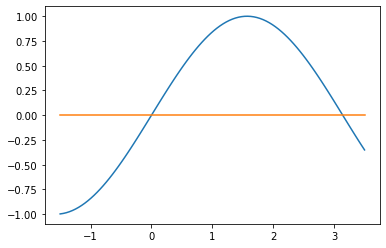

[0.]


In [6]:
def f(x):
    return np.sin(x)
    #return np.exp(-x)-x

# print(np.linspace(0,1,10)) # min, max, nbr_val

# Construction du graphique
x = np.linspace(-1.5,3.5,100)
y = f(x)

#plt.plot([1,2,3],[4,0,6])
plt.plot(x,y)

y = 0*x
plt.plot(x,y)

plt.show()

# Usage de fsolve
# Essayer init = 0 avec g !

init = 1
sol = fsolve(f,init)
print(sol)


<p style="font-size:150%; line-height:150%; font-weight:bold; background-color:#FFDD00">Exercice de TP :</p>

Mettez en oeuvre les tests définis dans l'exercice de CM et utilisez également les fonctions ci-dessous.
Pour les deux dernières, trouvez des conditions initiales qui ne plaisent pas à `fsolve`.

$$ f(x) = -24 + 14 x + 25 x^2 - 15 x^3 - x^4 + x^5,\, g(x) = (x^2 - 2)^2,\, h(x) = \frac{1}{1+x^4}$$

**Appelez l'enseignant pour qu'il valide votre campagne de tests.**

C:\Users\Julien\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\Julien\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The number of calls to function has reached maxfev = 400.
  warnings.warn(msg, RuntimeWarning)


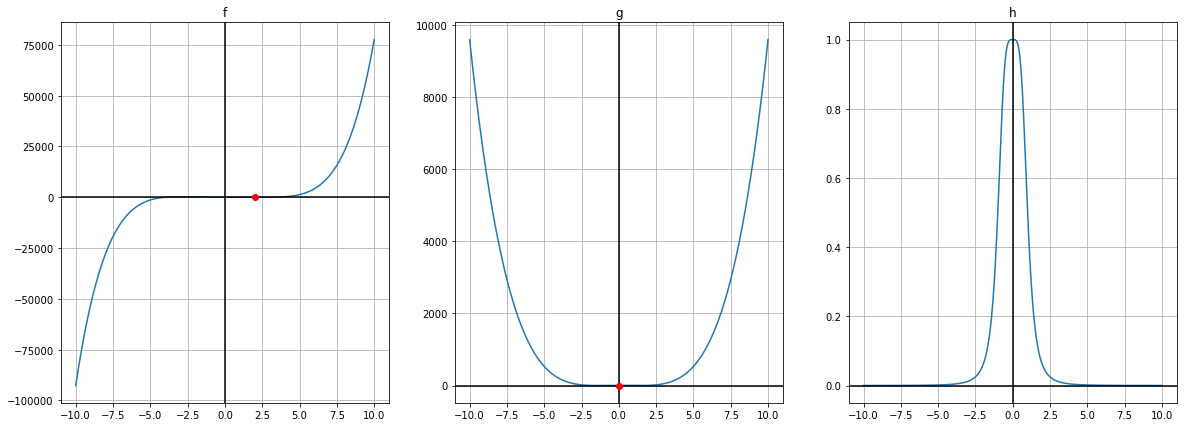

In [7]:
# Tests de la fonction fsolve

#déclaration des fonctions
def f(x):
    return x**5-x**4-15*x**3+25*x**2+14*x-24

def g(x):
    return (x**2-2)**2

def h(x):
    return 1/(1+x**4)

#affichage des fonctions
fig,ax = plt.subplots(1,3, figsize=(20,7))

def affiche(f, Xrange, i):
    X = np.linspace(Xrange[0],Xrange[1],1000)
    Y = f(X)
    ax[i].plot(X,Y)
    ax[i].set_title(str(f).split()[1])
    ax[i].grid(True, which='both')
    ax[i].axhline(y=0, color='k')
    ax[i].axvline(x=0, color='k')
    
    #test
    init = 0
    sol = fsolve(f,init)
    if abs(sol)<10 :
        ax[i].plot(sol, 0, marker='o', c='r')

affiche(f, (-10,10), 0)
affiche(g, (-10,10), 1)
affiche(h, (-10,10), 2)

plt.show()

<p style="font-size:150%; line-height:150%; font-weight:bold; color:#2F52A3">Dichotomie</p>

#### Principe général

A chaque étape, la taille de l'espace de recherche est divisé par deux.

#### Recherche dichotomique

**Théorème (des valeurs intermédiaires) :** Soit $f$ une fonction **continue** sur un intervalle $\lbrack a,b \rbrack$, telle que $f(a)f(b)<0$, alors il existe $c \in \lbrack a,b \rbrack$ tel que $f(c) = 0$.

**Algorithme :**

Entrée : $f$, $a$, $b$, $\varepsilon$

Sortie : $m$

+ On cherche $c$ dans l'intervalle $\lbrack a, b \rbrack$
+ On introduit : $m = \frac{a+b}{2}$
+ Si $f(a)f(m) < 0$, on remplace l'intervalle de recheche $\lbrack a,b\rbrack$ par $\lbrack a,m\rbrack$. Sinon, on remplace l'intervalle de recheche $\lbrack a,b\rbrack$ par $\lbrack m,b\rbrack$.
+ On s'arrête lorsque l'intervalle est de longueur inférieur à la précision $\varepsilon$ voulue.

<p style="font-size:150%; line-height:150%; font-weight:bold; background-color:#FFDD00">Exercice de CM :</p>

On considère la fonction $f(x) = \exp(-x) -x$ dans $\lbrack 0,1 \rbrack$

Calculez "à la main" les premières étapes de l'algorithme

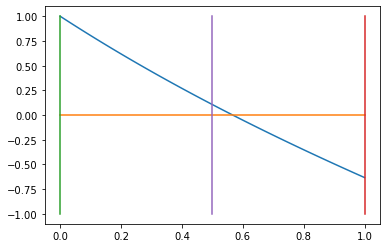

In [8]:
def f(x):
    return np.exp(-x)-x

a = 0
b = 1

# La courbe
x = np.linspace(a,b,100)
y = f(x)

plt.plot(x,y)

# L'axe des abscisses
y = 0*x

plt.plot(x,y)

# Quelques itérations
plt.plot([a,a],[-1,1])
plt.plot([b,b],[-1,1])
c = (a+b)/2
plt.plot([c,c],[-1,1])

plt.show()

#### Remarque utile pour le TP

Un algorithme itératif s'implémente souvent avec une boucle `while` dont la condition d'arrêt permet de réguler la précision du calcul

In [9]:
pas_precis = True
ca_y_est = 0
while pas_precis:
    if ca_y_est < 3:
        print("ben non, ca n'y est pas ...")
    else:
        pas_precis = False
        print("houra ! ça y est !!")
    ca_y_est+=1


ben non, ca n'y est pas ...
ben non, ca n'y est pas ...
ben non, ca n'y est pas ...
houra ! ça y est !!


<p style="font-size:150%; line-height:150%; font-weight:bold; background-color:#FFDD00">Exercice de TP : Dichotomie</p>

+ Implémentez une fonction `dicho(f,a,b,e)` qui retourne un réel $c \in \lbrack a,b \rbrack$, tel que $f$ s'annulle dans un intervalle de longueur inférieure à $e$ autour de $c$
+ Une représentation graphique a été construite en cours pour visualiser les itérations de la dichotomie. Automatisez cette construction et appelez l'enseignant pour qu'il visualise ce graphique.

In [10]:
# Codez la fonction dicho(f,a,b,e)
def dicho(f, a, b, e):
    res = []
    while b-a > e :
        c = (a+b)/2
        C = f(c)
        if f(a)*C<0 :
            b=c
        elif f(b)*C<0 :
            a=c
        elif f(a)==0.0 :
            return a
        elif f(b)==0.0 :
            return b
        else :
            return None
    return c

def dichoTab(f, a, b, e):
    res = []
    while b-a > e :
        c = (a+b)/2
        res.append(c)
        C = f(c)
        if f(a)*C<0 :
            b=c
        elif f(b)*C<0 :
            a=c
        elif f(a)==0.0 :
            return a
        elif f(b)==0.0 :
            return b
        else :
            return None
    return res

In [11]:
def f(x):
    return (x**2+2*x-5)

r = dicho(f, -5, 2.5, 10**-4)
print(f(r))
# Testez votre fonction, vous pouvez utiliser 
# les mêmes exemples que ceux utilisés pour fsolve


3.6644996725954115e-05


**Déposez votre fonction `dicho(f,a,b,e)` sur Moodle avant la fin de la semaine**

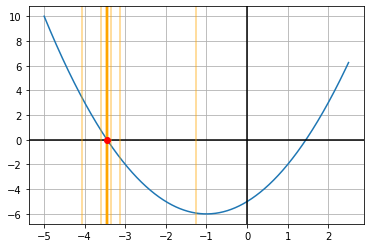

In [12]:
# Codez la représentation graphique

X = np.linspace(-5,2.5,1000)
Y = f(X)
plt.plot(X,Y)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

R = dichoTab(f, -5, 2.5, 10**-4)
for i in range(len(R)):
    plt.axvline(x=R[i], c='orange', alpha=0.5)
plt.plot(R[-1],0, marker='o', c='r')


**Appelez l'enseignant pour qu'il valide votre représentation graphique.**

<p style="font-size:150%; line-height:150%; font-weight:bold; color:#AD84AD">Pour aller plus loin :</p>

Etudiez empiriquement la complexité de la recherche dichotomique.

Comparez sur plusieurs exemples les temps de calcul pour :
+ Une recherche dichotomique
+ Une recherche séquentielle : on commence à $a$ et on avance de $\varepsilon$ jusqu'à avoir trouvé.

**Indication :** Vous pouvez utiliser `time.clock()`

In [13]:
# Comparez les temps de calcul
def sequentiel(f,a,e):
    mem = a
    a+=e
    while f(mem)*f(a)>0 :
        mem=a
        a+=e
    return mem

import time
ts = time.time()
r = sequentiel(f,-50,0.001)
print("seq : "+ str(time.time()-ts))
print(r)

td = time.time()
r = dicho(f, -50, 50, 0.001)
print("dicho : "+ str(time.time()-td))
print(r)

seq : 0.10609555244445801
-3.450000000025555
dicho : 0.0
-3.449249267578125


<p style="font-size:150%; line-height:150%; font-weight:bold; color:#AD84AD">Pour aller plus loin :</p>

Si vous avez écrit la dichotomie de manière itérative, écrivez un code récursif !

In [14]:
# Insérez votre code
def dichoRec(f,a,b,e):
    c=(a+b)/2
    if (b-a)/2 < e :
        return (c)
    elif f(a)*f(c)<0 :
        return (dicho(f,a,c,e))
    elif f(b)*f(c)<0 :
        return (dicho(f,c,b,e))
    elif f(a)==0 :
        return (a)
    elif f(b)==0 :
        return (b)

def f(x):
    return (x**2+2*x-5)

r = dichoRec(f, -5, 2.5, 10**-4)
print(r,f(r))

-3.4494972229003906 3.6644996725954115e-05


<p style="font-size:150%; line-height:150%; font-weight:bold; color:#2F52A3">Méthode de Newton</p>

#### Principe général

Il faut, à minima, que la fonction $f$ soit dérivable, mais ce n'est pas suffisant.

On itère la suite définie par récurrence par $x_0 \in \mathbb{R},\,x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$. A nouveau, le choix d'une bonne condition initial est important.

La convergence de cette méthode est plus rapide mais plus variable $\ldots$

#### Explication

La tangente à la courbe représentative de $f$ en un point $x_n$, a pour équation :
$$ y = f'(x_n) (x-x_n) + f(x_n) $$

Cette droite coupe d'axe des abscisses au point d'abscisse $x_{n+1}$ solution de l'équation :
$$ 0 = f'(x_n) (x_{n+1}-x_n) + f(x_n) $$

C'est à dire :
$$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$$

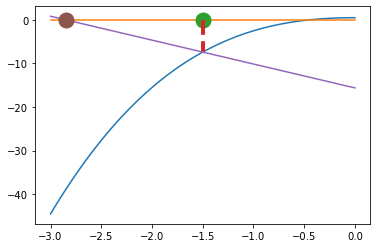

In [24]:
# Pour ce TP, les dérivées sont calculées "à la main", "papier-crayon",
# puis codées "en dur"
# Cette problématique sera abordée ultérieurement ...
def df(x):
    return -np.exp(-x)-1

# La courbe
x = np.linspace(-3,0,100)
y = f(x)

plt.plot(x,y)

# L'axe des abscisses
y = 0*x

plt.plot(x,y)

# Début de l'algorithme de Newton
x_init = -1.5
plt.plot(x_init, 0, marker='o', markersize = 15)
plt.plot([x_init,x_init],[0,f(x_init)], linestyle = 'dashed', linewidth = 4)

# La tangente en x_init
y = df(x_init)*(x - x_init) + f(x_init)

plt.plot(x,y)

# Premier point
x_un = x_init - f(x_init)/df(x_init)

plt.plot(x_un, 0, marker='o', markersize = 15)

plt.show()

#### Quelques résultats théoriques

**Théorème :** Soit $f : I \to \mathbb{R}$ une fonction de classe $\mathcal{C}^2$ sur un intervalle ouvert $I$ de $\mathbb{R}$. 
Soit $\alpha \in I$ tel que $f(\alpha) = 0$ et $f'(\alpha) \not= 0$.
Alors il existe $\eta > 0$ tel que pour tout $x_0 \in \rbrack \alpha - \eta, \alpha + \eta \lbrack$, la suite précédente converge.


**Théorème :** Soit $f : I \to \mathbb{R}$ une fonction de classe $\mathcal{C}^1$ sur un intervalle ouvert $I$ de $\mathbb{R}$, strictement croissante et convexe, et $\alpha \in I$ tel que $f(\alpha) = 0$.
Soit $x_0 \in I, x_0 > \alpha$. Alors la suite précédente converge en décroissant vers $\alpha$.

**Remarques :**

+ Comme $\alpha$ est inconnu, ce n'est pas possible de vérifier la condition a priori.
+ Il n'y a aucun moyen de connaitre "précisément" $\eta$.
+ Il n'y a aucun moyen de savoir quand arrêter le calcul.

**Problème de la condition d'arrêt :**

Deux approches "classiques" sont utilisables :

+ $|x_{n+1} - x_{n}|< \varepsilon$
+ $|f(x_{n})| < \varepsilon$

Mais il faut des conditions supplémentaires pour s'assurer qu'elles sont valides.

#### Quelques fonctions `Python`

In [16]:
# Quelques fonctions utiles
print(abs(-1)) # la valeur absolue
print(np.abs(np.array([-1,-2,-3]))) # sur tout un tableau
print(math.floor(1.9)) # arrondi inférieur
print(np.floor(np.array([-1.2,2.2,3.6]))) # sur tout un tableau

1
[1 2 3]
1
[-2.  2.  3.]


<p style="font-size:150%; line-height:150%; font-weight:bold; background-color:#FFDD00">Exercice de TP : la méthode de Newton</p>

+ Implémentez une fonction `newton(f,df,x_init,e)` qui implémente la méthode de Newton pour la fonction $f$ et sa dérivée $df$ (aucune vérification sur le fait que $df$ est bien la dérivée de $f$ ne sera faite), avec $x_{init}$ comme premier terme et $\varepsilon$ comme seuil pour la condition d'arrêt (pour Moodle, codez la condition $| x_{n+1} - x_n | < \varepsilon$).
+ Lors de vos tests, vous changerez la condition d'arrêt :
    1. $|x_{n+1} - x_{n}|< \varepsilon$
    2. $|f(x_{n})| < \varepsilon$
    3. Les deux simultanément
+ Une représentation graphique a été construite en cours pour visualiser les itérations de la méthode de Newton. Automatisez cette construction et appelez l'enseignant pour qu'il visualise ce graphique.

In [17]:
# Codez la fonction Newton(f,df,x,e)
def Newton(f,df,x_init,e):
    X = [x_init]
    X.append(x_init-f(x_init)/df(x_init))
    while abs(X[-1]-X[-2])>=e and abs(f(X[-1]))>=e :
        X.append(X[-1]-f(X[-1])/df(X[-1]))
    return (X[-1])

def NewtonTab(f,df,x_init,e):
    X = [x_init]
    X.append(x_init-f(x_init)/df(x_init))
    while abs(X[-1]-X[-2])>=e and abs(f(X[-1]))>=e :
        X.append(X[-1]-f(X[-1])/df(X[-1]))
    return (X)

Pour la méthode de Newton, en plus des exemples précédents, testez également :

+ $f(x) = \sqrt{|x|}$ avec $x_0 \not= 0$
+ $f(x) = x^3 -2x + 2$ avec $x_0 = 0$ ou $x_0 = 1$


In [18]:
# Testez la fonction Newton avec les exemples précédents
# (les anciens et les nouveaux)
# Calculez les dérivées "à la main"
# Changez de condition d'arrêt.

def f1(x):
    return (np.sqrt(abs(x)))

def df1(x):
    return (x/(2*abs(x)*f(x)))

def f2(x):
    return (x**3-2*x+2)

def df2(x):
    return(3*x-2)

**Déposez votre fonction `newton(f,df,x_init,e)` sur Moodle avant la fin de la semaine**

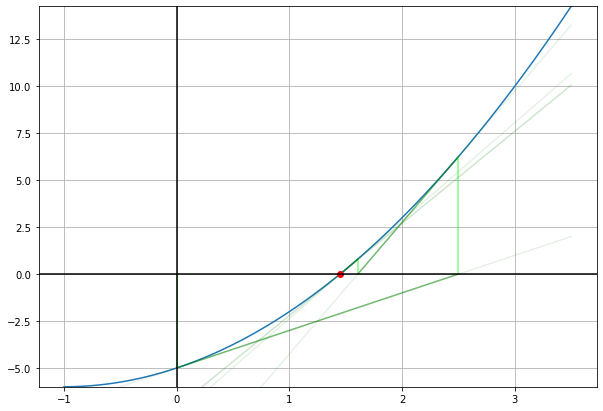

In [19]:
# Codez la représentation graphique
def f(x):
    return (x**2+2*x-5)

def df(x):
    return (2*x+2)

def getTan(f, df, X, x):
    b = -df(x)*x+f(x)
    Y = df(x)*X + b
    return Y

fig, ax = plt.subplots(1,1,figsize=(10,7))

def afficherNewton(f, df, R):
    #définition des valeurs en X et Y
    X = np.linspace(min(R)-1, max(R)+1, 1000)
    Y = f(X)
    
    ax.plot(X,Y) #on trace la fonction
    
    for i in range(len(R)):#pour chaque point
        #on trace la tangente
        T = getTan(f, df, X, R[i])
        ax.plot(X,T,c='green', alpha=0.1)
        
        #on trace le trait vertical
        ax.plot([R[i],R[i]],[0,f(R[i])],c='lime', alpha=0.5)
        
        #on trace le trait suivant la tangente
        if i>0 :
            ax.plot([R[i-1],R[i]],[f(R[i-1]),0],c='green', alpha=0.5)
    
    ax.plot(R[-1],0,c='r', marker='o') #on marque la solution
    ax.set_ylim([min(Y), max(Y)]) #on limite l'affichage à cause des tangentes
    ax.grid(True, which='both') #grille
    ax.axhline(y=0, color='k') #axe des ordonnées
    ax.axvline(x=0, color='k') #axe des abscisses

R = NewtonTab(f, df, 0, 10**-3)

afficherNewton(f, df, R)

**Appelez l'enseignant pour qu'il valide votre représentation graphique.**

<p style="font-size:150%; line-height:150%; font-weight:bold; color:#AD84AD">Pour aller plus loin :</p>

+ Faites une recherche sur la "séparation des racines" d'un polynômes
+ Utilisez le résultat de votre recherche et vos fonctions précédentes (dichotomie et/ou Newton) afin de mettre en oeuvre une fonction retournant toutes les racines réelles d'un polynôme.

Notion de séparation des racines

<p style="font-size:150%; line-height:150%; font-weight:bold; color:#D67D3A">A compléter ...</p>

In [20]:
# Code de votre fonction
def f(x):
    return (x**3-2*x**2+0.01*x+0.5)

#fonction qui renvoie une troncature de nb à n chiffres après la virgule
def getDec(nb, n):
    s = str(nb)
    i=0
    while i<len(s) and s[i]!="." :
        i+=1
    i = min(len(s), i+n)
    return float(s[:i])

#fonction qui calcule une approximation de la dérivée
def deriv(x,f,e):
    return ((f(x+e)-f(x-e))/(2*e))

#fonction de l'algorithme de Newton adapté pour ce cas
def Newton2(f,deriv,x_init,e):
    X = [x_init]
    X.append(x_init-f(x_init)/deriv(x_init,f,e))
    while abs(X[-1]-X[-2])>=e and abs(f(X[-1]))>=e :
        X.append(X[-1]-f(X[-1])/deriv(X[-1],f,e))
    return (X[-1])

'''
fonction de recherche des poles de f compris dans Xrange
n est le nombre de chiffres significatifs voulus
'''
def racines(f, Xrange, n):
    n+=1 #on augmente n car il faut être plus précis afin de s'assurer des valeurs
    e = 10**-n #précision
    V = np.linspace(Xrange[0], Xrange[1], int((Xrange[1]-Xrange[0])//e)) #tableau de valeurs initiales
    S = [] #liste des solutions trouvées
    
    for i in range(len(V)):
        if abs(f(V[i]))<e*100 : #cette condition sert surtout à accélérer le programme
            S.append(Newton2(f,deriv,V[i],e)) #on ajoute une nouvelle solution
    
    #procédé d'élimination des solutions identiques
    res = []
    for i in range(len(S)):
        a = getDec(S[i], n-1)
        if not a in res :
            res.append(a)
    
    return res

n=3
R = racines(f, (-10,10), n)
print(R)
    

[-0.44, 0.6, 1.84]


<p style="font-size:150%; line-height:150%; font-weight:bold; color:#2F52A3">Méthode du point fixe</p>

#### Principe général

+ Etant donnée une fonction $f$ d'une variable réelle à valeurs réelles, un point fixe $x \in \mathbb{R}$ est une solution de l'équation $f(x) = x$.
+ Si $x$ est un point fixe alors $\ldots$ il ne bouge pas :
$$ \ldots = f(f(f(x))) = f(f(x)) = f(x) = x$$
+ Sous certaines hypothèses (par exemple $f$ contractante), on trouve un point fixe en itérant la suite :
$$x_{n+1} = f(x_n)$$

#### Résultats théoriques

**Définition :** Une fonction $f : I \to \mathbb{R}$ est contractante lorsque :
$$\exists k \in \rbrack 0,1\lbrack,\forall x,y \in I, |f(y) - f(x)| < k |y-x|$$

**Théorème :** Si $f$ est contractante et possède un point fixe, alors la suite précédente converge.

#### Condition d'arrêt

Lorsque la suite converge vers un point fixe, alors la condition suivante est exploitable :
$$|x_{n+1} - x_n| < \varepsilon$$

<p style="font-size:150%; line-height:150%; font-weight:bold; background-color:#FFDD00">Exercice de CM : la suite logistique</p>

Soit la fonction $f$ suivante :
$$ f(x) = \mu x (1-x)$$

Nous allons étudier la suite logisitique définie par $x_0 \in \mathbb{R},\, x_{n+1} = f(x_n)$. Autrement dit, on s'intéresse au point fixe de $f$ pour différentes valeur de $\mu$ (et différentes conditions initiales $x_0$).

Valeurs de $\mu$ à essayer : $\frac{1}{2}, 1, 2, 3, 1 + \sqrt{5}, 1 + \sqrt{6}, 1 + \sqrt{8}, 3.45, 3.54$

Varier les conditions initiales

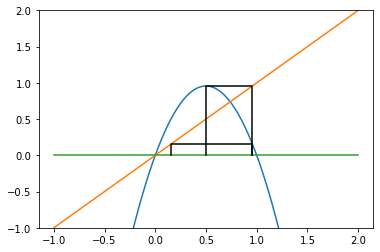

0.5 0.9571067811865476 0.15716991411008918


In [21]:
mu = 1 + math.sqrt(8)

def logit(mu,x):
    return mu*x*(1 - x)

# La courbe
x = np.linspace(-1,2,100)
y = logit(mu,x)

plt.plot(x,y)

# Les droites y = x et y = 0
plt.plot(x,x)
plt.plot(x,0*x)

# Première itération
x_0 = 0.5
x_1 = logit(mu,x_0) # Nouveau point
# On calcule, puis on reporte
plt.plot([x_0,x_0,x_1,x_1],[0,x_1,x_1,0], color = "black") 

# Seconde itération
x_2 = logit(mu,x_1)
plt.plot([x_1,x_1,x_2,x_2],[0,x_2,x_2,0], color = "black")

plt.ylim(-1,2)
plt.show()

print(x_0,x_1,x_2)

<p style="font-size:150%; line-height:150%; font-weight:bold; background-color:#FFDD00">Exercice de TP : la méthode du point fixe</p>

La suite logistique a volontairement été choisie parce qu'elle fonctionne mal pour la méthode du point fixe. 

Pour implémenter la méthode du point fixe, vous utiliserez la condition d'arrêt ci-dessus et vous ajouterez une limitation à $N = 1000$ itérations (ou moins, à vous de tester). Si ce nombre maximal d'itérations est atteint, vous retournerez un message indiquant que la méthode a échoué.

L'important dans cet exercice est la visualisation. Automatisez ce qui a été entamé en cours.

0.3333333326795955


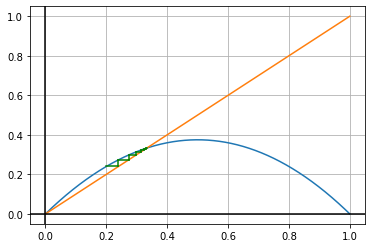

In [22]:
# Codez, testez et visualisez la méthode du point fixe

def l(x):
    return 1.5*x*(1 - x)

#fonction qui renvoie une troncature de nb à n chiffres après la virgule
def getDec(nb, n):
    s = str(nb)
    i=0
    while i<len(s) and s[i]!="." :
        i+=1
    i = min(len(s), i+n)
    return float(s[:i])

#méthode du point fixe de manière récursive
def pointFixeRec(f, x0, i=0):
    if i>1000 :
        print("la méthode a échoué")
        return None
    else :
        if f(x0)!=x0 :
            return pointFixe(f, f(x0), i+1)
        else :
            return x0

def pointFixe(f, x0, e):
    X=[x0, f(x0)]
    while len(X)<1000 and getDec(X[-2], e) != getDec(X[-1], e) :
        X.append(f(X[-1]))
    return X

def afficherPF(f, x0, e):
    X = pointFixe(f,x0,e)
    print(X[-1])
    XX = np.linspace(0,1,1000)
    YY = f(XX)
    plt.plot(XX,YY, c='C00')
    plt.plot(XX,XX, c='C01')
    plt.axvline(x=0, c='k')
    plt.axhline(y=0, c='k')
    plt.grid(True)
    
    for i in range(len(X)-2):
        plt.plot([X[i],X[i+1]],[X[i+1], X[i+1]], c='g')
        plt.plot([X[i+1],X[i+1]],[X[i+1],X[i+2]], c='g')
    plt.show()

fig, ax = plt.subplots(1,1)
afficherPF(l, 0.2, 10)

**Appelez l'enseignant pour qu'il valide votre représentation graphique.**

<p style="font-size:150%; line-height:150%; font-weight:bold; color:#D67D3A">Attention : </p>

+ Pour le TP01, pendant la séance, vous avez $4$ exercices à montrer : tests de `fsolve`, graphique de dichotomie, graphique de Newton et graphique de point fixe.
+ Pour le TP01, avant la fin de semaine, vous avez $3$ fonctions à déposer : `solve2`, `dicho` et `newton`
+ Lors de l'évaluation sur feuille, il vous sera demandé de calculer "à la main", les premiers termes d'une suite issue d'un de ces algorithmes et de faire une représentation graphique
